In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import os
%matplotlib inline

Чтение данных

In [2]:
# app_events = pd.read_csv('app_events.csv', dtype={"event_id":np.int32, "device_id": np.int64, 
# "is_installed": np.int8, "is_active": np.int8})
rel_path = os.getcwd()
events = pd.read_csv(os.path.join(rel_path, 'events.csv'))
gender_age = pd.read_csv(os.path.join(rel_path, 'gender_age_train.csv'))
girls = gender_age[gender_age['gender']=='F'].copy()
boys = gender_age[gender_age['gender']=='M'].copy()
phone_brand_dev_model = pd.read_csv(os.path.join(rel_path, 'phone_brand_device_model.csv'))
mapping = pd.read_csv(os.path.join(rel_path, 'brand_mapping.csv'))
phone_brand_dev_model = pd.merge(phone_brand_dev_model, mapping, on='phone_brand')
print phone_brand_dev_model.head()

             device_id phone_brand device_model brand_eng
0 -8890648629457979026          小米           红米    Xiaomi
1  1277779817574759137          小米         MI 2    Xiaomi
2 -3883532755183027260          小米        MI 2S    Xiaomi
3 -5827952925479472594          小米  MI One Plus    Xiaomi
4 -5776341595519925628          小米        MI 2A    Xiaomi


Самые частые события

In [3]:
most_freq = pd.merge(events, phone_brand_dev_model, on='device_id')
most_freq = most_freq.groupby(['phone_brand']).count().iloc[:,0:1]
most_freq.columns = ['count']
most_freq = most_freq.sort_values(['count'], ascending=False).head(20)
most_freq_list = most_freq.index.tolist()
most_freq.index = range(len(most_freq.index))
most_freq['phone_brand'] = pd.Series(most_freq_list, index=most_freq.index)

Самые популярные бренды

In [4]:
mstfq_phone_brand_dev_model = pd.merge(phone_brand_dev_model, most_freq, on='phone_brand')
print mstfq_phone_brand_dev_model.head()

             device_id phone_brand device_model brand_eng   count
0 -8890648629457979026          小米           红米    Xiaomi  625675
1  1277779817574759137          小米         MI 2    Xiaomi  625675
2 -3883532755183027260          小米        MI 2S    Xiaomi  625675
3 -5827952925479472594          小米  MI One Plus    Xiaomi  625675
4 -5776341595519925628          小米        MI 2A    Xiaomi  625675


Построение распределение дем.групп по phone_brand с разбиением по полу.

In [5]:
brand_girls = pd.merge(girls, mstfq_phone_brand_dev_model, on='device_id')
brand_boys = pd.merge(boys, mstfq_phone_brand_dev_model, on='device_id')

In [6]:
brand_girls_pivot = brand_girls.pivot_table(values='gender', index=['group'], columns= ['brand_eng'], aggfunc='count')
brand_boys_pivot = brand_boys.pivot_table(values='gender', index=['group'], columns= ['brand_eng'], aggfunc='count')

Бренды - демо группы

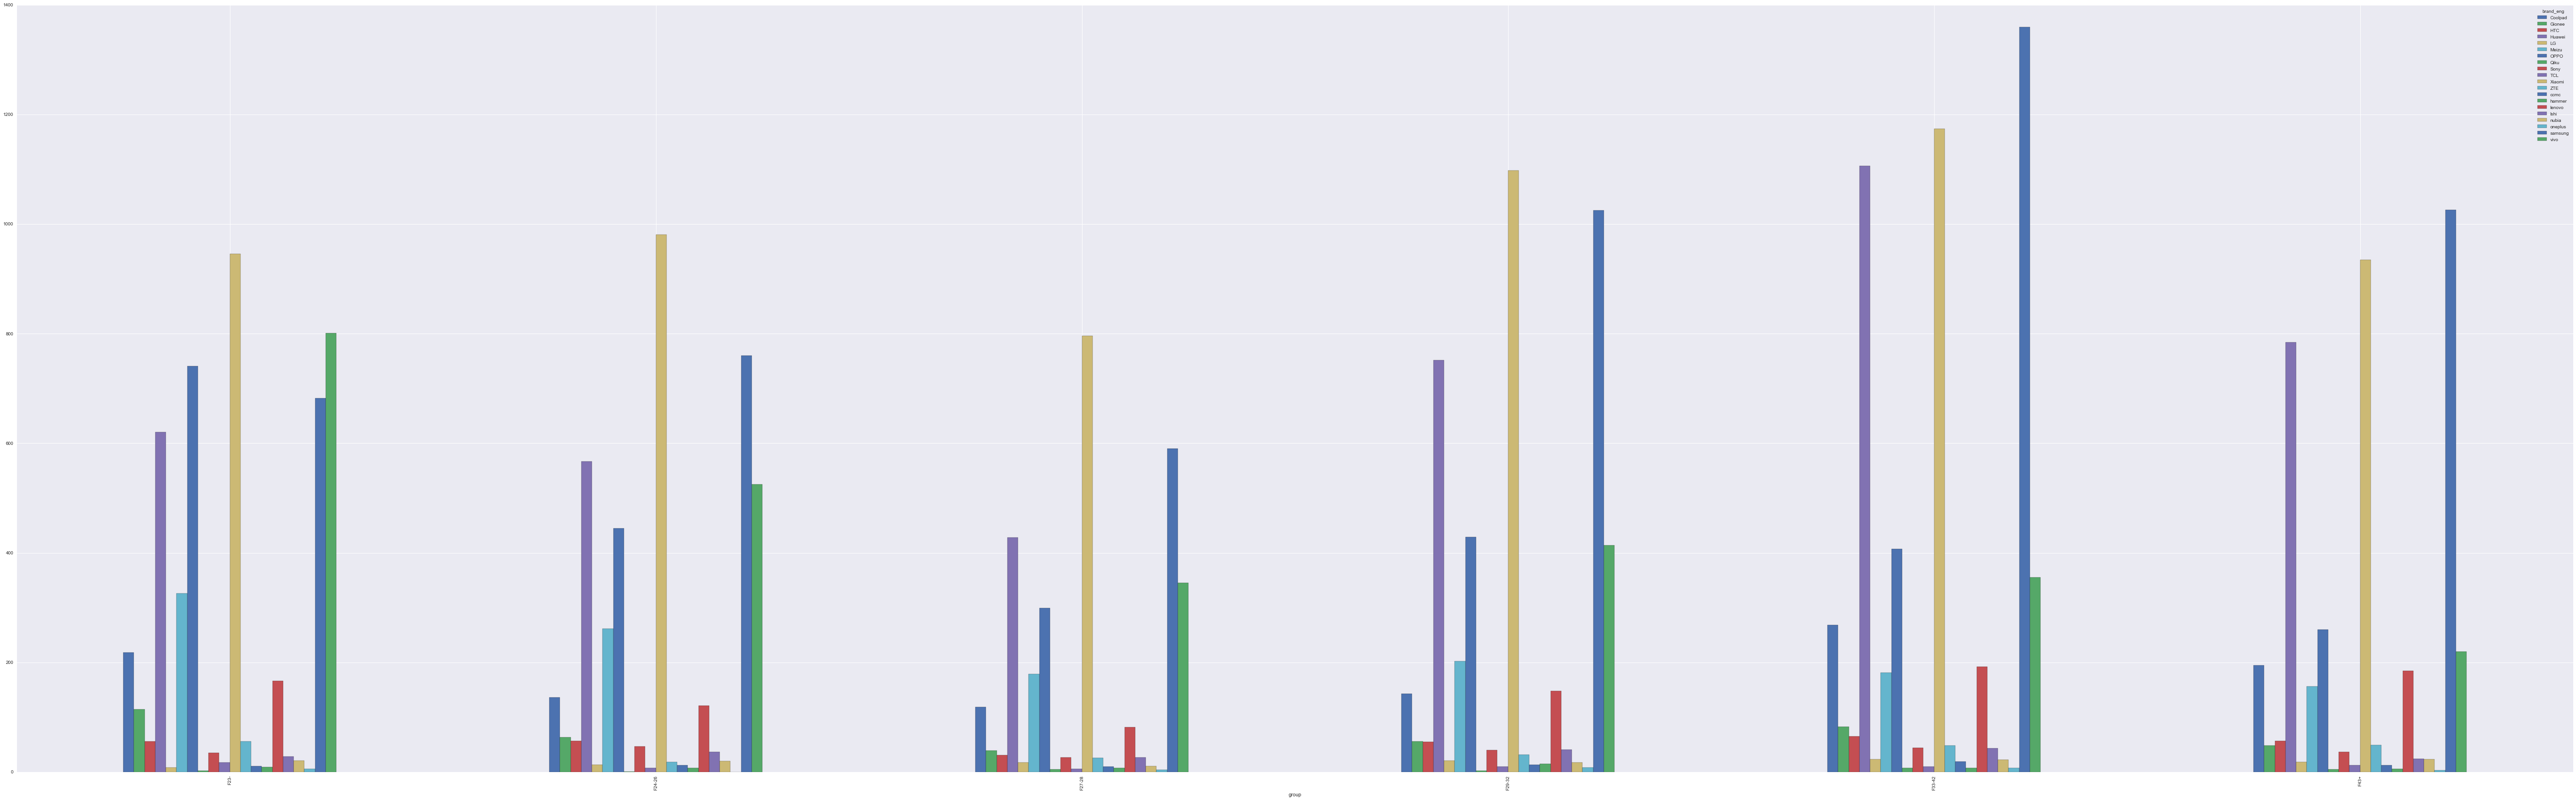

In [7]:
brand_girls_pivot.plot(kind='bar', figsize=(100,30))

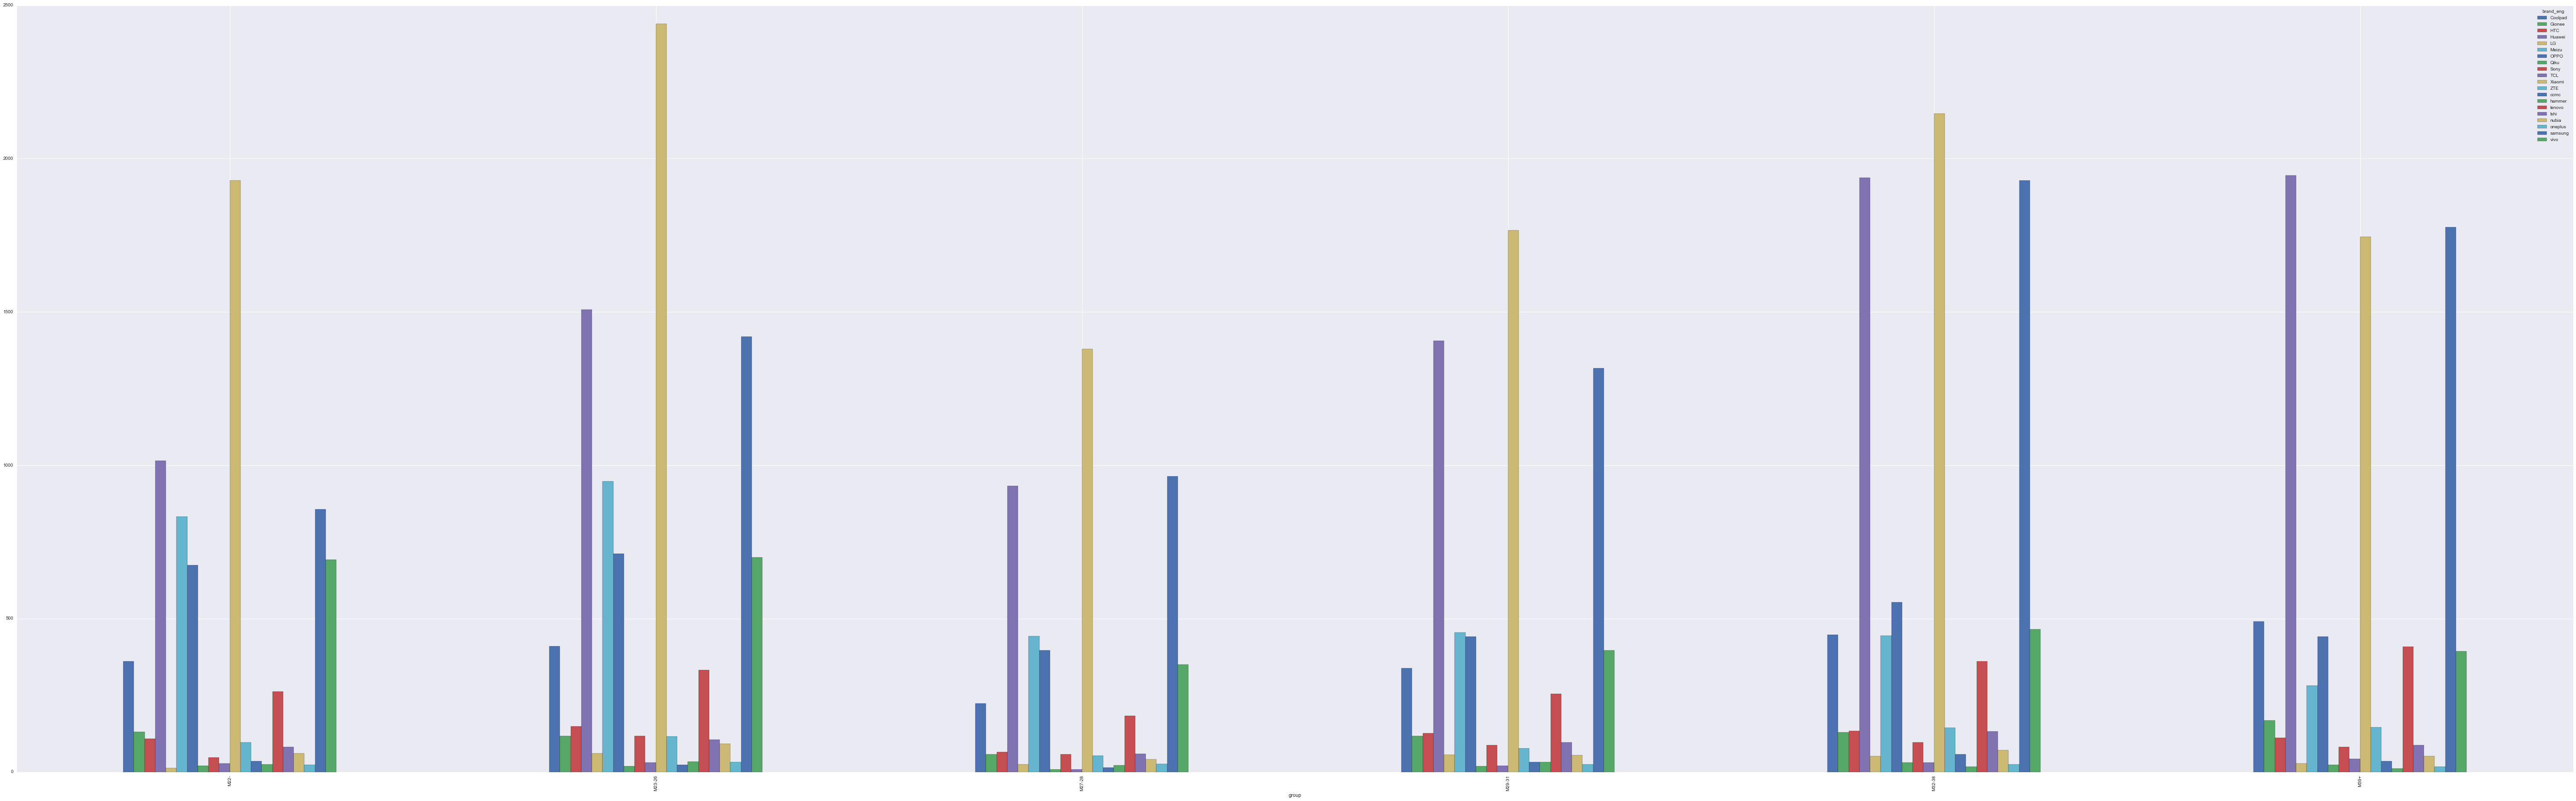

In [8]:
brand_boys_pivot.plot(kind='bar', figsize=(100,30))